In [1]:
import pandas_datareader as pdr
key="286edd6caa057b4b3eab875c4da228e4a1bf1e06"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-11-08 00:00:00+00:00,111.06,111.720,109.70,110.31,24254179,26.131551,26.286844,25.811554,25.955082,97016716,0.0,1.0
1,AAPL,2016-11-09 00:00:00+00:00,110.88,111.320,108.05,109.88,59176361,26.089199,26.192727,25.423322,25.853907,236705444,0.0,1.0
2,AAPL,2016-11-10 00:00:00+00:00,107.79,111.090,105.83,111.09,57134541,25.362146,26.138610,24.900973,26.138610,228538164,0.0,1.0
3,AAPL,2016-11-11 00:00:00+00:00,108.43,108.870,106.55,106.92,34143898,25.512733,25.616261,25.070384,25.157442,136575592,0.0,1.0
4,AAPL,2016-11-14 00:00:00+00:00,105.71,107.809,104.08,107.32,51175504,24.872738,25.366616,24.489212,25.251559,204702016,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,AAPL,2021-11-01 00:00:00+00:00,148.96,149.70,147.80,148.985,73396551,148.743688,149.482614,147.585373,148.768652,73396551,0.00,1.0
1254,AAPL,2021-11-02 00:00:00+00:00,150.02,151.57,148.65,148.660,68922374,149.802149,151.349898,148.434139,148.444124,68922374,0.00,1.0
1255,AAPL,2021-11-03 00:00:00+00:00,151.49,151.97,149.82,150.390,54511534,151.270015,151.749317,149.602440,150.171612,54511534,0.00,1.0
1256,AAPL,2021-11-04 00:00:00+00:00,150.96,152.43,150.64,151.580,60394616,150.740784,152.208650,150.421249,151.359884,60394616,0.00,1.0
1257,AAPL,2021-11-05 00:00:00+00:00,151.28,152.20,150.06,151.890,65463883,151.280000,152.200000,150.060000,151.890000,65463883,0.22,1.0


In [8]:
df_new=df.reset_index()['close']

In [9]:
df_new

0       111.06
1       110.88
2       107.79
3       108.43
4       105.71
         ...  
1253    148.96
1254    150.02
1255    151.49
1256    150.96
1257    151.28
Name: close, Length: 1258, dtype: float64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

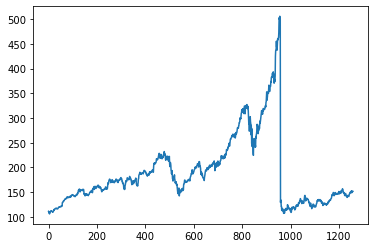

In [11]:
plt.plot(df_new)

In [12]:
import numpy as np


In [13]:
df_new

0       111.06
1       110.88
2       107.79
3       108.43
4       105.71
         ...  
1253    148.96
1254    150.02
1255    151.49
1256    150.96
1257    151.28
Name: close, Length: 1258, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler=MinMaxScaler(feature_range=(0,1))

In [16]:
df_new=scaler.fit_transform(np.array(df_new).reshape(-1,1))

In [17]:
print(df_new)

[[0.01336231]
 [0.01291273]
 [0.00519506]
 ...
 [0.11434138]
 [0.11301763]
 [0.11381687]]


In [18]:
training_size=int(len(df_new)*0.65)
test_size=len(df_new)-training_size
train_data,test_data=df_new[0:training_size,:],df_new[training_size:len(df_new),:1]

In [19]:
training_size,test_size

(817, 441)

In [20]:
train_data

array([[0.01336231],
       [0.01291273],
       [0.00519506],
       [0.00679355],
       [0.        ],
       [0.00349668],
       [0.01068984],
       [0.01058994],
       [0.01086468],
       [0.01503572],
       [0.01521055],
       [0.0137869 ],
       [0.01518557],
       [0.0146361 ],
       [0.01436136],
       [0.01201359],
       [0.00944103],
       [0.01046506],
       [0.00849193],
       [0.01058994],
       [0.01328738],
       [0.01600979],
       [0.02058045],
       [0.01895699],
       [0.02367751],
       [0.02367751],
       [0.02525101],
       [0.02562566],
       [0.02729907],
       [0.02807333],
       [0.02834807],
       [0.0264249 ],
       [0.02699935],
       [0.02884759],
       [0.02759878],
       [0.02752385],
       [0.02525101],
       [0.02607523],
       [0.02575054],
       [0.02722414],
       [0.03047105],
       [0.03316849],
       [0.03346821],
       [0.03506669],
       [0.03381787],
       [0.03329337],
       [0.03569109],
       [0.035

In [21]:
import numpy
# convert an array of values into matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [24]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 289ms/step - loss: 0.0172 - val_loss: 0.0263
Epoch 2/100
12/12 [==============================] - 2s 180ms/step - loss: 0.0043 - val_loss: 0.0252
Epoch 3/100
12/12 [==============================] - 2s 170ms/step - loss: 0.0020 - val_loss: 0.0195
Epoch 4/100
12/12 [==============================] - 2s 167ms/step - loss: 8.5950e-04 - val_loss: 0.0232
Epoch 5/100
12/12 [==============================] - 2s 175ms/step - loss: 5.8736e-04 - val_loss: 0.0285
Epoch 6/100
12/12 [==============================] - 2s 167ms/step - loss: 5.1660e-04 - val_loss: 0.0253
Epoch 7/100
12/12 [==============================] - 2s 166ms/step - loss: 4.8834e-04 - val_loss: 0.0243
Epoch 8/100
12/12 [==============================] - 2s 166ms/step - loss: 4.6699e-04 - val_loss: 0.0254
Epoch 9/100
12/12 [==============================] - 2s 166ms/step - loss: 4.7417e-04 - val_loss: 0.0247
Epoch 10/100
12/12 [==============================] - 2s 166ms/step

12/12 [==============================] - 2s 168ms/step - loss: 1.8337e-04 - val_loss: 0.0074
Epoch 79/100
12/12 [==============================] - 2s 167ms/step - loss: 1.6587e-04 - val_loss: 0.0072
Epoch 80/100
12/12 [==============================] - 2s 177ms/step - loss: 1.7291e-04 - val_loss: 0.0072
Epoch 81/100
12/12 [==============================] - 2s 176ms/step - loss: 1.6591e-04 - val_loss: 0.0073
Epoch 82/100
12/12 [==============================] - 2s 176ms/step - loss: 1.6265e-04 - val_loss: 0.0068
Epoch 83/100
12/12 [==============================] - 2s 168ms/step - loss: 1.7802e-04 - val_loss: 0.0069
Epoch 84/100
12/12 [==============================] - 2s 167ms/step - loss: 1.7600e-04 - val_loss: 0.0072
Epoch 85/100
12/12 [==============================] - 2s 168ms/step - loss: 1.5660e-04 - val_loss: 0.0068
Epoch 86/100
12/12 [==============================] - 2s 167ms/step - loss: 1.5551e-04 - val_loss: 0.0069
Epoch 87/100
12/12 [==============================] - 2s 16

In [31]:
import tensorflow as tf

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
print(train_predict)

[[0.09778216]
 [0.09879829]
 [0.09952693]
 [0.09987103]
 [0.09981418]
 [0.09943316]
 [0.09858327]
 [0.09744567]
 [0.09611141]
 [0.09491925]
 [0.09392306]
 [0.09307153]
 [0.092703  ]
 [0.09280002]
 [0.0934805 ]
 [0.09474068]
 [0.0961643 ]
 [0.09747241]
 [0.09847011]
 [0.09965171]
 [0.10121983]
 [0.10292763]
 [0.10440978]
 [0.10594803]
 [0.10828407]
 [0.11146154]
 [0.11486442]
 [0.11807457]
 [0.12116528]
 [0.12385532]
 [0.12588821]
 [0.1261212 ]
 [0.12512305]
 [0.1236112 ]
 [0.12228604]
 [0.12140146]
 [0.12090082]
 [0.12080732]
 [0.1209727 ]
 [0.1212793 ]
 [0.12144451]
 [0.12149066]
 [0.12191767]
 [0.12244746]
 [0.12302455]
 [0.12375412]
 [0.12449033]
 [0.12389953]
 [0.12125251]
 [0.11735162]
 [0.11286388]
 [0.10838633]
 [0.10409568]
 [0.10112541]
 [0.0994724 ]
 [0.09907535]
 [0.09955685]
 [0.10063844]
 [0.10189082]
 [0.10262427]
 [0.1030931 ]
 [0.10300649]
 [0.10249248]
 [0.10165007]
 [0.10077935]
 [0.09979646]
 [0.09905305]
 [0.09882325]
 [0.09916504]
 [0.09995271]
 [0.10134475]
 [0.10

In [34]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

195.2235113568488

In [36]:
math.sqrt(mean_squared_error(ytest,test_predict))

196.93917723251923

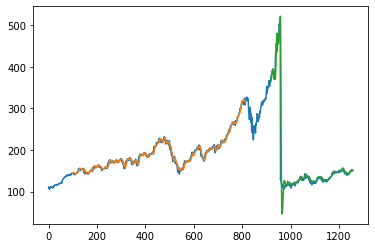

In [37]:
look_back=100
trainPredictPlot = numpy.empty_like(df_new)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df_new)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_new)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_new))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [38]:
len(test_data)

441

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.09068884559668317,
 0.09705779509466006,
 0.09373595084669567,
 0.09840651381187876,
 0.09688296118687245,
 0.09973025625655624,
 0.10849692791847748,
 0.10682351765822468,
 0.1016034766971377,
 0.09176282531594981,
 0.10100404615615166,
 0.09913082571557025,
 0.1026275038713223,
 0.1070233278385534,
 0.1080973075578201,
 0.10255257505369902,
 0.0980818222688446,
 0.09973025625655624,
 0.10027973425246023,
 0.0994305409860633,
 0.10402617513362311,
 0.10300214795943852,
 0.10327688695739051,
 0.10097906988361055,
 0.10085418852090516,
 0.0996303511663919,
 0.10027973425246023,
 0.10784754483240916,
 0.10837204655577198,
 0.1134172536090714,
 0.11109446026275038,
 0.10152854787951449,
 0.10237774114591136,
 0.10609920575453319,


In [42]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.11467762]
101
1 day input [0.06181627 0.06641191 0.07060792 0.06990859 0.06918427 0.06843499
 0.07260602 0.07647735 0.07805085 0.07882512 0.08554373 0.09068885
 0.0970578  0.09373595 0.09840651 0.09688296 0.09973026 0.10849693
 0.10682352 0.10160348 0.09176283 0.10100405 0.09913083 0.1026275
 0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.088416   0.09063889 0.09386083
 0.09288676 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215
 0.1020031  0.10752285 0.10877167 0.

8 day output [[0.12065572]]
9 day input [0.07805085 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595
 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348
 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731
 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618
 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973
 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774
 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323
 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904
 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721
 0.10759778 0.10077926 0.09298666 0.0942105  0.10025476 0.10270243
 0.10292722 0.0990559  0.09041411 0.09271192 0.08939008 0.09226235
 0.08349568 0.088416   0.09063889 0.09386083 0.09288676 0.09266197
 0.08941506 0.08791648 0.09503472 0.09773215 0.1020031  0.10752285
 0.10877167 0.10932114 0.10734802 0.10722314 0.10892152 0.10774764
 0.11703881 0.11012039

16 day output [[0.12665309]]
17 day input [0.09973026 0.10849693 0.10682352 0.10160348 0.09176283 0.10100405
 0.09913083 0.1026275  0.10702333 0.10809731 0.10255258 0.09808182
 0.09973026 0.10027973 0.09943054 0.10402618 0.10300215 0.10327689
 0.10097907 0.10085419 0.09963035 0.10027973 0.10784754 0.10837205
 0.11341725 0.11109446 0.10152855 0.10237774 0.10609921 0.1098956
 0.10967081 0.1065238  0.10447575 0.10712323 0.11841251 0.11519057
 0.11688896 0.11973625 0.12135971 0.12732904 0.12338279 0.12078525
 0.10804736 0.10949598 0.10592437 0.10819721 0.10759778 0.10077926
 0.09298666 0.0942105  0.10025476 0.10270243 0.10292722 0.0990559
 0.09041411 0.09271192 0.08939008 0.09226235 0.08349568 0.088416
 0.09063889 0.09386083 0.09288676 0.09266197 0.08941506 0.08791648
 0.09503472 0.09773215 0.1020031  0.10752285 0.10877167 0.10932114
 0.10734802 0.10722314 0.10892152 0.10774764 0.11703881 0.11012039
 0.10802238 0.11066986 0.11434138 0.11301763 0.11381687 0.11467762
 0.11526656 0.11595854 0

 0.12942334 0.13009514 0.13075957 0.13141702]
24 day output [[0.13206787]]
25 day input [0.10702333 0.10809731 0.10255258 0.09808182 0.09973026 0.10027973
 0.09943054 0.10402618 0.10300215 0.10327689 0.10097907 0.10085419
 0.09963035 0.10027973 0.10784754 0.10837205 0.11341725 0.11109446
 0.10152855 0.10237774 0.10609921 0.1098956  0.10967081 0.1065238
 0.10447575 0.10712323 0.11841251 0.11519057 0.11688896 0.11973625
 0.12135971 0.12732904 0.12338279 0.12078525 0.10804736 0.10949598
 0.10592437 0.10819721 0.10759778 0.10077926 0.09298666 0.0942105
 0.10025476 0.10270243 0.10292722 0.0990559  0.09041411 0.09271192
 0.08939008 0.09226235 0.08349568 0.088416   0.09063889 0.09386083
 0.09288676 0.09266197 0.08941506 0.08791648 0.09503472 0.09773215
 0.1020031  0.10752285 0.10877167 0.10932114 0.10734802 0.10722314
 0.10892152 0.10774764 0.11703881 0.11012039 0.10802238 0.11066986
 0.11434138 0.11301763 0.11381687 0.11467762 0.11526656 0.11595854
 0.11671024 0.11749114 0.11828331 0.1190774

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df_new)

1258

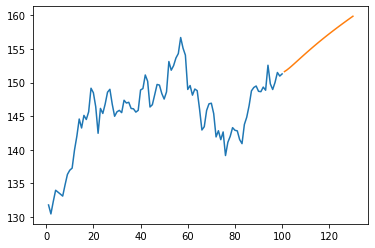

In [45]:
plt.plot(day_new,scaler.inverse_transform(df_new[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

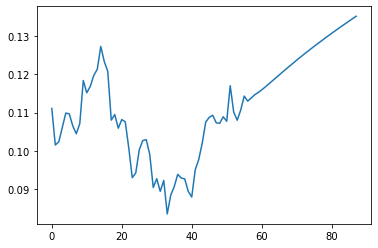

In [46]:
df2=df_new.tolist()
df2.extend(lst_output)
plt.plot(df2[1200:])

In [47]:
df2=scaler.inverse_transform(df2).tolist()

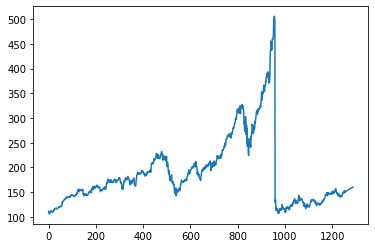

In [48]:
plt.plot(df2)